<a href="https://colab.research.google.com/github/AtreyeeS/MLAP2023/blob/main/scikit_learn_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn
- Python package
- Simple and efficient tools for predictive data analysis
- Accesible and reusable
- Built on NumPy, SciPy y matplotlib
- Open source, BSD license

## References

- https://scikit-learn.org/stable/index.html
- https://github.com/scikit-learn/scikit-learn



# Simple example: Digits Classification Exercise

Note: this notebooks has been adapted from the original [here](https://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py).

In [1]:
# This allows us to display graphics generated with matplotlib inside the notebook.
%matplotlib inline

In [6]:
import numpy as np


# Digits dataset
- 1797 handwritten digits, 8x8 pixels
- Further info [here](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits).


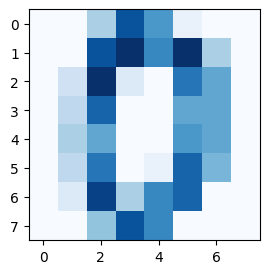

Label: 0


In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display a given digit and its label
index = 0
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[index], cmap="Blues", interpolation='nearest')
plt.show()
print('Label: {}'.format(digits.target[index]))


In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
np.shape(digits.target)

(1797,)

In [17]:
np.shape(digits.images[0])

(8, 8)

In [18]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Prepare training and test sets

In [21]:
# Prepare training and test sets
X_digits, Y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)
split = .9

X_train = X_digits[:int(split * n_samples)]
Y_train = Y_digits[:int(split * n_samples)]
X_test = X_digits[int(split * n_samples):]
Y_test = Y_digits[int(split * n_samples):]

In [57]:
np.shape(X_train)

(1617, 64)

In [39]:
Y_digits[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
int(split * n_samples)

1617

In [22]:
X_train

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.75  , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.5625, 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 1.    , 0.3125, 0.    ]])

In [23]:
X_test

array([[0.    , 0.    , 0.3125, ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 0.5625, 0.375 , 0.125 ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

# An example: K-Nearest-Neighbors classifier

In [24]:
from sklearn import neighbors

# Training (fit)
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [25]:
# Score on test set
knn.score(X_test, Y_test) # Accuracy

0.9611111111111111

In [26]:
# Prediction on test
print(knn.predict(X_test))

[5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7
 2 2 5 7 3 5 8 4 5 0 8 9 7 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 2
 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4
 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 1 4 9 0 8 9 8]


In [60]:
# Prediction on particular example
index = 9

print('Probability: {}'.format(knn.predict_proba(X_test)[index]))
print('Prediction: {}'.format(knn.predict(X_test)[index]))
print('True label: {}'.format(Y_test[index]))


Probability: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction: 1
True label: 1


Label: 9


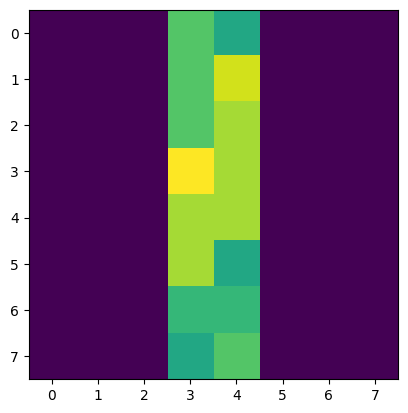

In [61]:
plt.imshow(digits.images[int(split * n_samples)+index])
print('Label: {}'.format(digits.target[index]))

# An example: muulutilayer perceptron classifier

In [46]:
from sklearn.neural_network import MLPClassifier

# Training
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [47]:
# Score on test
mlp.score(X_test, Y_test) # Accuracy

0.95

In [62]:
# Trying different hyperparameters
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test) # Accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9555555555555556

In [66]:
mlp.save

AttributeError: ignored